Nama: Arieldhipta Tarliman

NIM: 2702234636

Submission File: https://drive.google.com/drive/folders/1rRgXggfgtY5MnCTVWp0OBOHqFSJQMjWh?usp=drive_link

Video: https://drive.google.com/file/d/13ru9ldzDK_4ijro6paSgTpdxQ3GU-ztU/view?usp=drive_link

Dataset: https://bit.ly/FinalExamDatasetMD

a. Gender = Laki-laki atau Wanita

b. Age = Usia seseorang dalam tahun

c. Height = Tinggi dalam meter

d. Weight = Berat dalam kilogram

e. family_history_with_overweight = Apakah orang tersebut memiliki riwayat keluarga dengan kelebihan berat badan

f. FAVC = Jika orang tersebut sering mengonsumsi makanan berkalori tinggi (ya/tidak)

g. FCVC = Frekuensi konsumsi sayuran (skala dari 1 hingga 3)

h. NCP = Jumlah makanan utama per hari

i. CAEC = Frekuensi mengonsumsi makanan di antara waktu makan (Tidak pernah, Kadang-kadang, Sering, Selalu)

j. SMOKE = Apakah orang tersebut merokok (ya/tidak)

k. CH2O = Asupan air harian (skala dari 1 hingga 3)

l. SCC = Jika orang tersebut memantau asupan kalori mereka (ya/tidak)

m. FAF = Frekuensi aktivitas fisik (skala dari 0 hingga 3)

n. TUE = Waktu yang dihabiskan untuk menggunakan teknologi (skala dari 0 hingga 3)

o. CALC = Frekuensi konsumsi alkohol (Tidak pernah, Kadang-kadang, Sering, Selalu)

p. MTRANS = Moda transportasi utama (Mobil, Sepeda, Sepeda Motor, Transportasi Umum, Jalan Kaki)

q. NObeyesedad = Tingkat obesitas (Insufficient Weight, Normal Weight, Overweight Level I, Overweight level II, Obesity Type I, Obesity Type II, Obesity Type III)

Manajemen ingin mengembangkan sistem prediksi berbasis data yang bisa mengklasifikasikan tingkat obesitas
seseorang berdasarkan gaya hidup dan kebiasaan sehari-hari. Dengan begitu, kampanye kesehatan dapat
difokuskan pada individu yang berada pada tingkat risiko tingg

# Import Library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pickle
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import logging
logging.basicConfig(filename='warnings.log', level=logging.WARNING)
logging.captureWarnings(True) 


# Read Dataset

In [122]:
df = pd.read_csv('ObesityDataSet2.csv')

# Basic EDA

In [123]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


In [124]:
df.shape

(1056, 17)

In [125]:
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1056.000000,1056.000000,1019.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,1.700066,86.497633,2.421374,2.651686,1.998002,0.987528,0.642227
std,0.091560,26.181219,0.537591,0.804457,0.612930,0.850452,0.615533
min,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,66.000000,2.000000,2.525000,1.530000,0.110000,0.000000
50%,1.700000,82.635000,2.390000,3.000000,2.000000,1.000000,0.583000
75%,1.760000,107.965000,3.000000,3.000000,2.442500,1.602500,1.000000
max,1.950000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

Bedasarkan information tersebut bisa kita lihat terdapat kolom 'Age' yang terdapat di tipe data yang kurang tepat. Selain itu, terdapat missing values di beberapa kolom seperti 'FCVC' & 'MTRANS' yang perlu kita validasi lebih lanjut.

# Handling Missing Values

Mari kita cek missing values per kolom

In [127]:
df.isna().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              37
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            26
NObeyesdad                         0
dtype: int64

In [128]:
print(df.isna().sum().sum())

63


Lalu cek missing values per baris

In [129]:
df[df.isna().any(axis=1)]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
17,Male,20 years,1.81,85.32,yes,yes,NaN,3.00,Sometimes,no,1.97,no,1.07,0.777,Sometimes,Public_Transportation,Overweight_Level_I
18,Female,19,1.57,44.32,no,no,2.98,3.00,Frequently,no,1.02,yes,1.33,0.000,Sometimes,NaN,Insufficient_Weight
30,Male,18,1.84,60.00,yes,yes,NaN,4.00,Sometimes,no,2.00,no,2.00,0.000,no,Automobile,Insufficient_Weight
46,Female,39,1.74,86.93,no,yes,NaN,3.06,Sometimes,no,1.13,no,2.83,0.045,Sometimes,Automobile,Overweight_Level_I
51,Female,41,1.57,79.49,yes,yes,NaN,3.00,Sometimes,no,2.95,no,0.00,0.000,no,Automobile,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,Male,18,1.70,90.00,no,yes,3.00,3.00,Sometimes,no,2.00,no,2.00,0.000,Sometimes,NaN,Obesity_Type_I
893,Male,18,1.79,59.68,yes,yes,NaN,4.00,Sometimes,no,2.00,no,2.00,0.220,no,Automobile,Insufficient_Weight
906,Male,33,1.71,83.02,yes,yes,NaN,2.80,Sometimes,no,2.99,no,2.15,0.000,no,Automobile,Overweight_Level_II
1000,Female,26,1.68,104.59,yes,yes,NaN,3.00,Sometimes,no,1.30,no,0.28,0.929,Sometimes,Public_Transportation,Obesity_Type_III


Bisa terlihat total missing values eprkolom adalah 63 sedangakn missng values per baris adalah 62 berarti ada 1 baris yang kedua kolommnya missing values

In [130]:
ratio_mis_val = len(df[df.isna().any(axis=1)]) / len(df) * 100
print(f"Ratio missing values dalam dataframe: {ratio_mis_val:.2f}%")

Ratio missing values dalam dataframe: 5.87%


# Further Elaboration

In [131]:
df = df.dropna()

Dikarenakan hanya memopengaruhi kurang lebih 6% dari dataset & ini merupakan modelling dalam bidang medis yang mana keakuratan data dan model sangat berpengaruh lebih baik untuk mendrop missing values tersebut.

# Handling Duiplicated Values

In [132]:
print(df.duplicated().sum())

10


In [133]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
96,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
227,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
285,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
326,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
436,Female,22,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
558,Female,18,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
701,Female,21,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
949,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
960,Female,16,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
996,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I


Terdapat 10 darta yang duplicated maka lebih baik drop duplicated values tersebut

In [134]:
df = df.drop_duplicates(keep='first')

In [135]:
print(df.duplicated().sum())

0


Dataset sudah bersih dari duplikat

# Handling Unique Values

In [136]:
for x in df:
    print(df[x].value_counts())
    print("="*100)
    print("")

Gender
Male      497
Female    487
Name: count, dtype: int64

Age
23          113
21          113
18           97
26           92
19           77
22           70
20           65
24           40
25           35
17           33
30           29
31           27
38           21
27           21
33           17
34           15
32           14
29           13
16           10
39           10
37           10
35            9
28            9
40            8
41            6
55            3
21 years      3
44            3
46            2
19 years      2
22 years      2
36            2
23 years      2
17 years      1
25 years      1
15            1
36 years      1
26 years      1
33 years      1
42            1
43            1
51            1
45            1
48            1
Name: count, dtype: int64

Height
1.75    60
1.70    58
1.76    50
1.65    48
1.63    40
1.60    37
1.62    36
1.71    35
1.77    34
1.72    34
1.69    33
1.61    32
1.80    32
1.64    30
1.66    30
1.67    30
1.78    26
1.73    2

Alasan utama kolom Age merupakan kolom dengan datatype object dikarenakan terdapat string oleh karena itu kita menghabis strign tersebut dan mengubah datatype kolom tesrebut menjadi integer.

In [137]:
df['Age'] = df['Age'].replace(' years', '', regex=True).astype(int)

In [138]:
df['Age'].value_counts()

Age
21    116
23    115
18     97
26     93
19     79
22     72
20     65
24     40
25     36
17     34
30     29
31     27
27     21
38     21
33     18
34     15
32     14
29     13
39     10
16     10
37     10
35      9
28      9
40      8
41      6
44      3
36      3
55      3
46      2
15      1
42      1
43      1
51      1
45      1
48      1
Name: count, dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          984 non-null    object 
 1   Age                             984 non-null    int64  
 2   Height                          984 non-null    float64
 3   Weight                          984 non-null    float64
 4   family_history_with_overweight  984 non-null    object 
 5   FAVC                            984 non-null    object 
 6   FCVC                            984 non-null    float64
 7   NCP                             984 non-null    float64
 8   CAEC                            984 non-null    object 
 9   SMOKE                           984 non-null    object 
 10  CH2O                            984 non-null    float64
 11  SCC                             984 non-null    object 
 12  FAF                             984 non-

# EDA Summary

In [140]:
missing_values = df.isnull().mean()*100
data_type = df.dtypes
unique_values_count = df.nunique()
null_count = df.isnull().sum()

summary_1 = pd.DataFrame({
    'Null Count': null_count,
    'Null %': missing_values,
    'Datatype': data_type,
    'Unique value': unique_values_count
})

summary_1.sort_values(by = 'Null %', ascending= False)

,Null Count,Null %,Datatype,Unique value
Gender,0,0.0,object,2
Age,0,0.0,int64,35
Height,0,0.0,float64,47
Weight,0,0.0,float64,681
family_history_with_overweight,0,0.0,object,2
FAVC,0,0.0,object,2
FCVC,0,0.0,float64,145
NCP,0,0.0,float64,189
CAEC,0,0.0,object,4
SMOKE,0,0.0,object,2


# Plotting

In [141]:
categorical_columns = []
numerical_columns = []

for i in df.columns:
    # Categorize columns as numerical or categorical
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

print(f'Categorical: {categorical_columns}\n')
print(f'Numeric: {numerical_columns}')

Categorical: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

Numeric: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


## Numerical

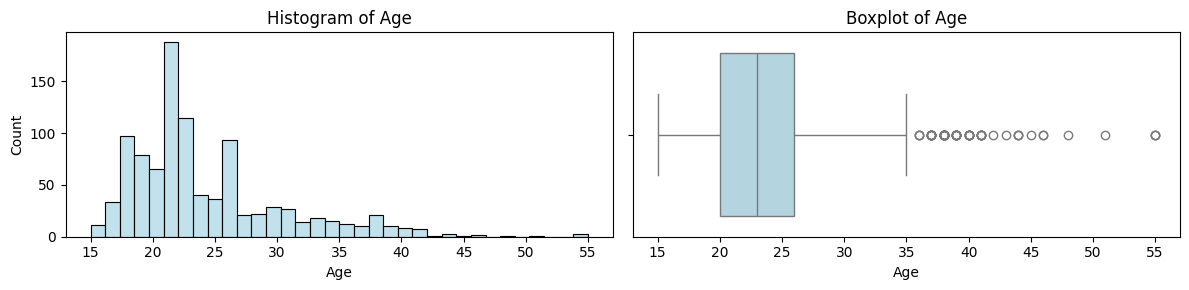

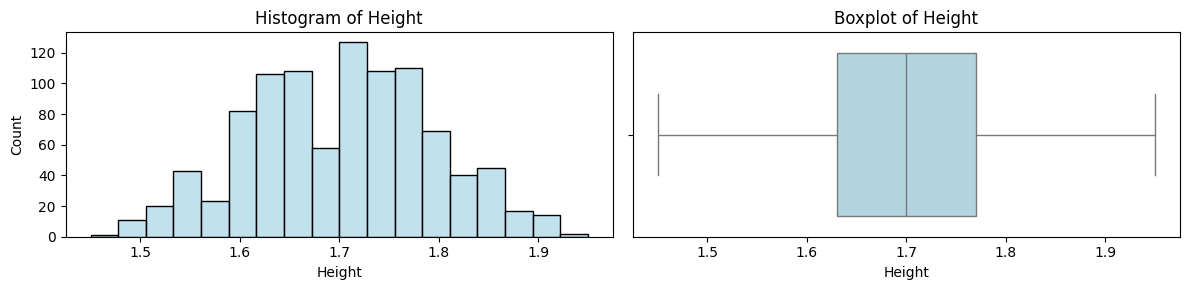

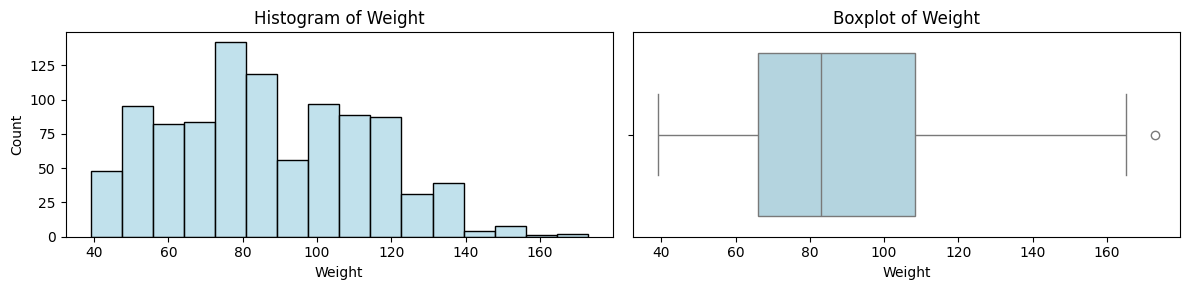

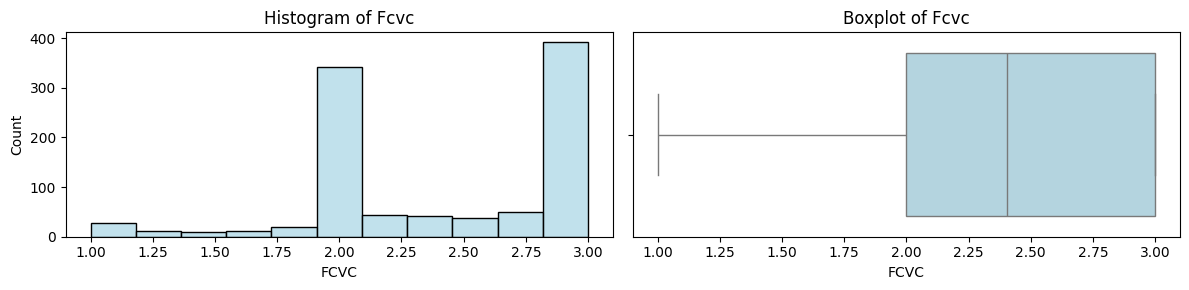

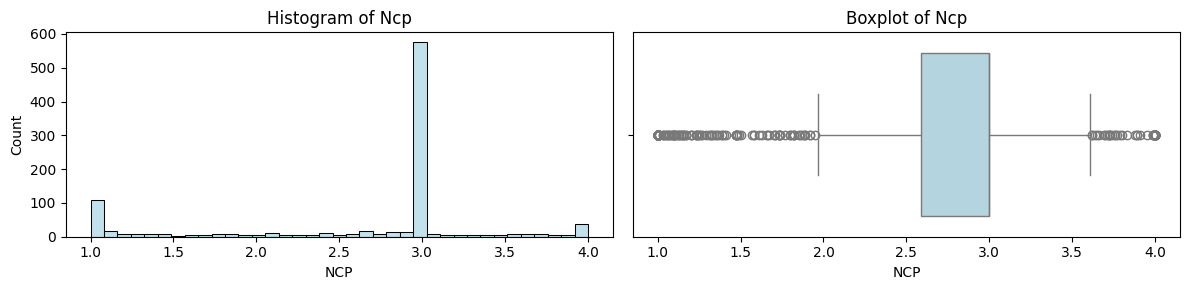

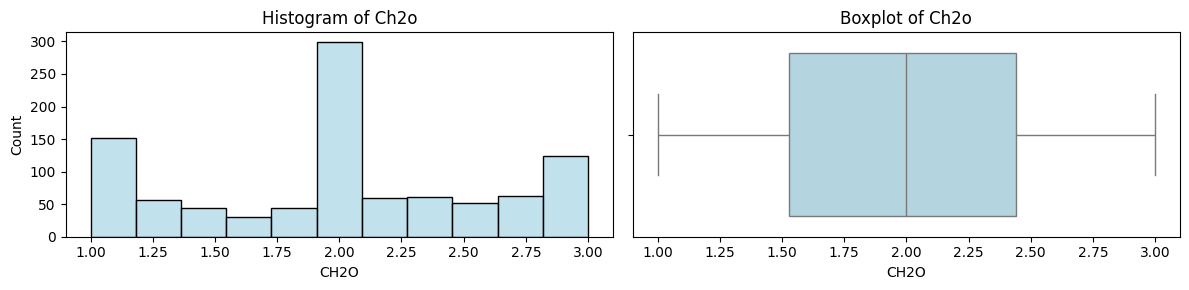

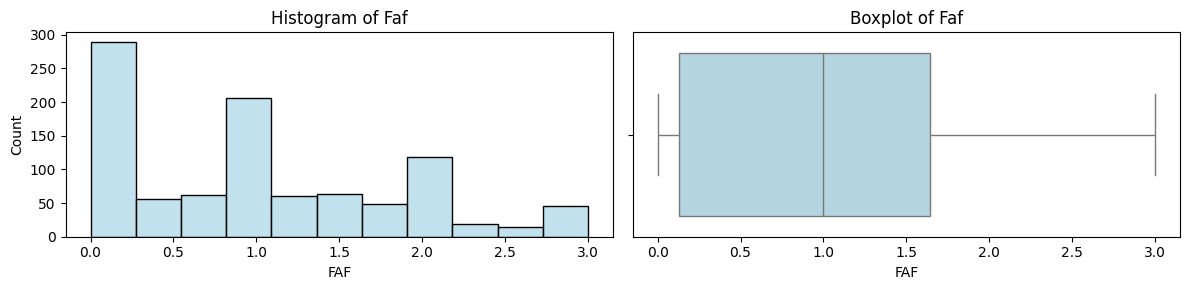

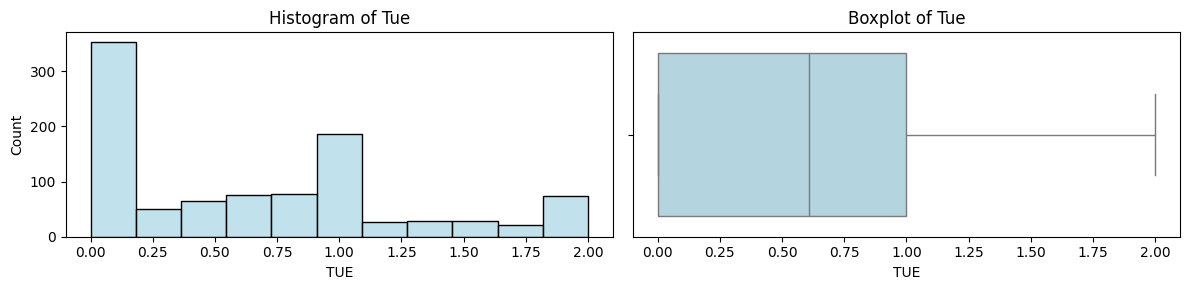

In [142]:
for i, var in enumerate(numerical_columns, 1):
    plt.figure(figsize=(12, 3))  
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], color= 'lightblue')  
    plt.title(f"Histogram of {var.capitalize()}")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var], color= 'lightblue')
    plt.title(f"Boxplot of {var.capitalize()}")
    plt.tight_layout()
    plt.show()

In [143]:
for i, var in enumerate(numerical_columns, 1):
    print("="*100)
    print(f'{var} - Skewness: {df[var].skew()}')
    print(f'{var} - Kurtosis: {df[var].kurt()}')
    print(f'{var} - Shapiro : {shapiro(df[var])}')

Age - Skewness: 1.4691599461537002
Age - Kurtosis: 2.512310551402434
Age - Shapiro : ShapiroResult(statistic=np.float64(0.8704209800916123), pvalue=np.float64(8.840527905655118e-28))
Height - Skewness: 0.016835773053353164
Height - Kurtosis: -0.5244607068154576
Height - Shapiro : ShapiroResult(statistic=np.float64(0.992844505642788), pvalue=np.float64(0.00011081291944856487))
Weight - Skewness: 0.26002633644007267
Weight - Kurtosis: -0.6796200634855367
Weight - Shapiro : ShapiroResult(statistic=np.float64(0.9763318080633168), pvalue=np.float64(1.4313568263599725e-11))
FCVC - Skewness: -0.44849039875150265
FCVC - Kurtosis: -0.6378129348970893
FCVC - Shapiro : ShapiroResult(statistic=np.float64(0.8372890557519214), pvalue=np.float64(1.5779462565639863e-30))
NCP - Skewness: -1.0440512005989333
NCP - Kurtosis: 0.1538489659841482
NCP - Shapiro : ShapiroResult(statistic=np.float64(0.7497730989902031), pvalue=np.float64(4.254201052703599e-36))
CH2O - Skewness: -0.08850102470029973
CH2O - Kurt

Melalui hasil diatas dapat diketahui bahwa tidak ada data kolom  yang berdistribusi secara normal melalui shapoio test.

Dalam test skewness, age memilki tail yang lebih condong ke kanan, menandakan lebih banyak respondent yang berusia muda.

NCP  condong ke kiri (negatif). Ini berarti mayoritas responden memiliki jumlah makan utama yang tinggi, dengan tail ke arah jumlah yang lebih sedikit.

Sebagian besar kolom memiliki Kurtosis negatif. Ini berarti distribusinya lebih "datar" daripada distribusi normal dan memiliki lebih sedikit outlier di ujungnya.

Age adalah pengecualian dengan Kurtosis positif (Leptokurtic), yang menunjukkan "ekor" yang lebih tebal, sejalan dengan temuan skewness dan potensi adanya outlier (responden yang usianya jauh dari rata-rata).


### Outliers

In [144]:
for var in numerical_columns:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    if outliers.shape[0] > 0:
        print(f"Number of outliers in {var}: {outliers.shape[0]}")
        # Convert the outlier values to a list and print it
        distinct_outliers = outliers[var].unique().tolist()
        print(f"Distinct outlier values in {var}: {distinct_outliers}")
    print()  # Print a newline for better readability

Number of outliers in Age: 71
Distinct outlier values in Age: [38, 44, 41, 39, 40, 37, 36, 55, 46, 42, 43, 51, 45, 48]


Number of outliers in Weight: 1
Distinct outlier values in Weight: [173.0]


Number of outliers in NCP: 256
Distinct outlier values in NCP: [1.0, 4.0, 1.8, 1.1, 1.47, 1.74, 1.32, 1.71, 1.26, 1.01, 3.71, 1.15, 1.11, 3.89, 1.73, 1.25, 3.99, 1.17, 3.95, 1.35, 1.05, 3.88, 1.03, 3.76, 3.72, 1.48, 3.8, 3.64, 1.7, 1.14, 1.49, 1.39, 1.81, 1.16, 3.79, 1.57, 1.31, 1.85, 1.24, 1.61, 3.74, 3.83, 1.09, 1.82, 1.34, 3.66, 1.4, 1.36, 1.37, 1.5, 3.69, 1.13, 3.65, 1.95, 1.88, 1.89, 1.77, 3.91, 1.92, 1.27, 1.66, 1.87, 1.33, 1.06, 3.77, 3.62, 1.07, 1.41, 1.12, 1.04, 1.23, 1.63, 3.73, 1.86, 1.2, 1.08, 1.21, 1.29, 1.67, 3.7, 1.58]






### Insight Numerical

 Namun bisa dilihat disini otulier yang terdapat di Age, Weight tidak ada yang sangat tidak wajar (memungkinkan untuk terjad). 

 Sedangkan NCP dikarenakan value sangat terkonsentrasi di 3 kali makan sehari sehingga value lain seperti sehaari mkaan satu kali atau 4 kali dianggap otulier, walaupun sebenarnya value tersebut sangatlah memungkinkan

Oleh karena itu, saya memutuskan untuk tidak menghapus outlier dan memutuskan untuk menggunakan model yang sanggup terhadap outliers seperti Random FOrest dan XGBoost sebagai komparasi model.

## Categorical

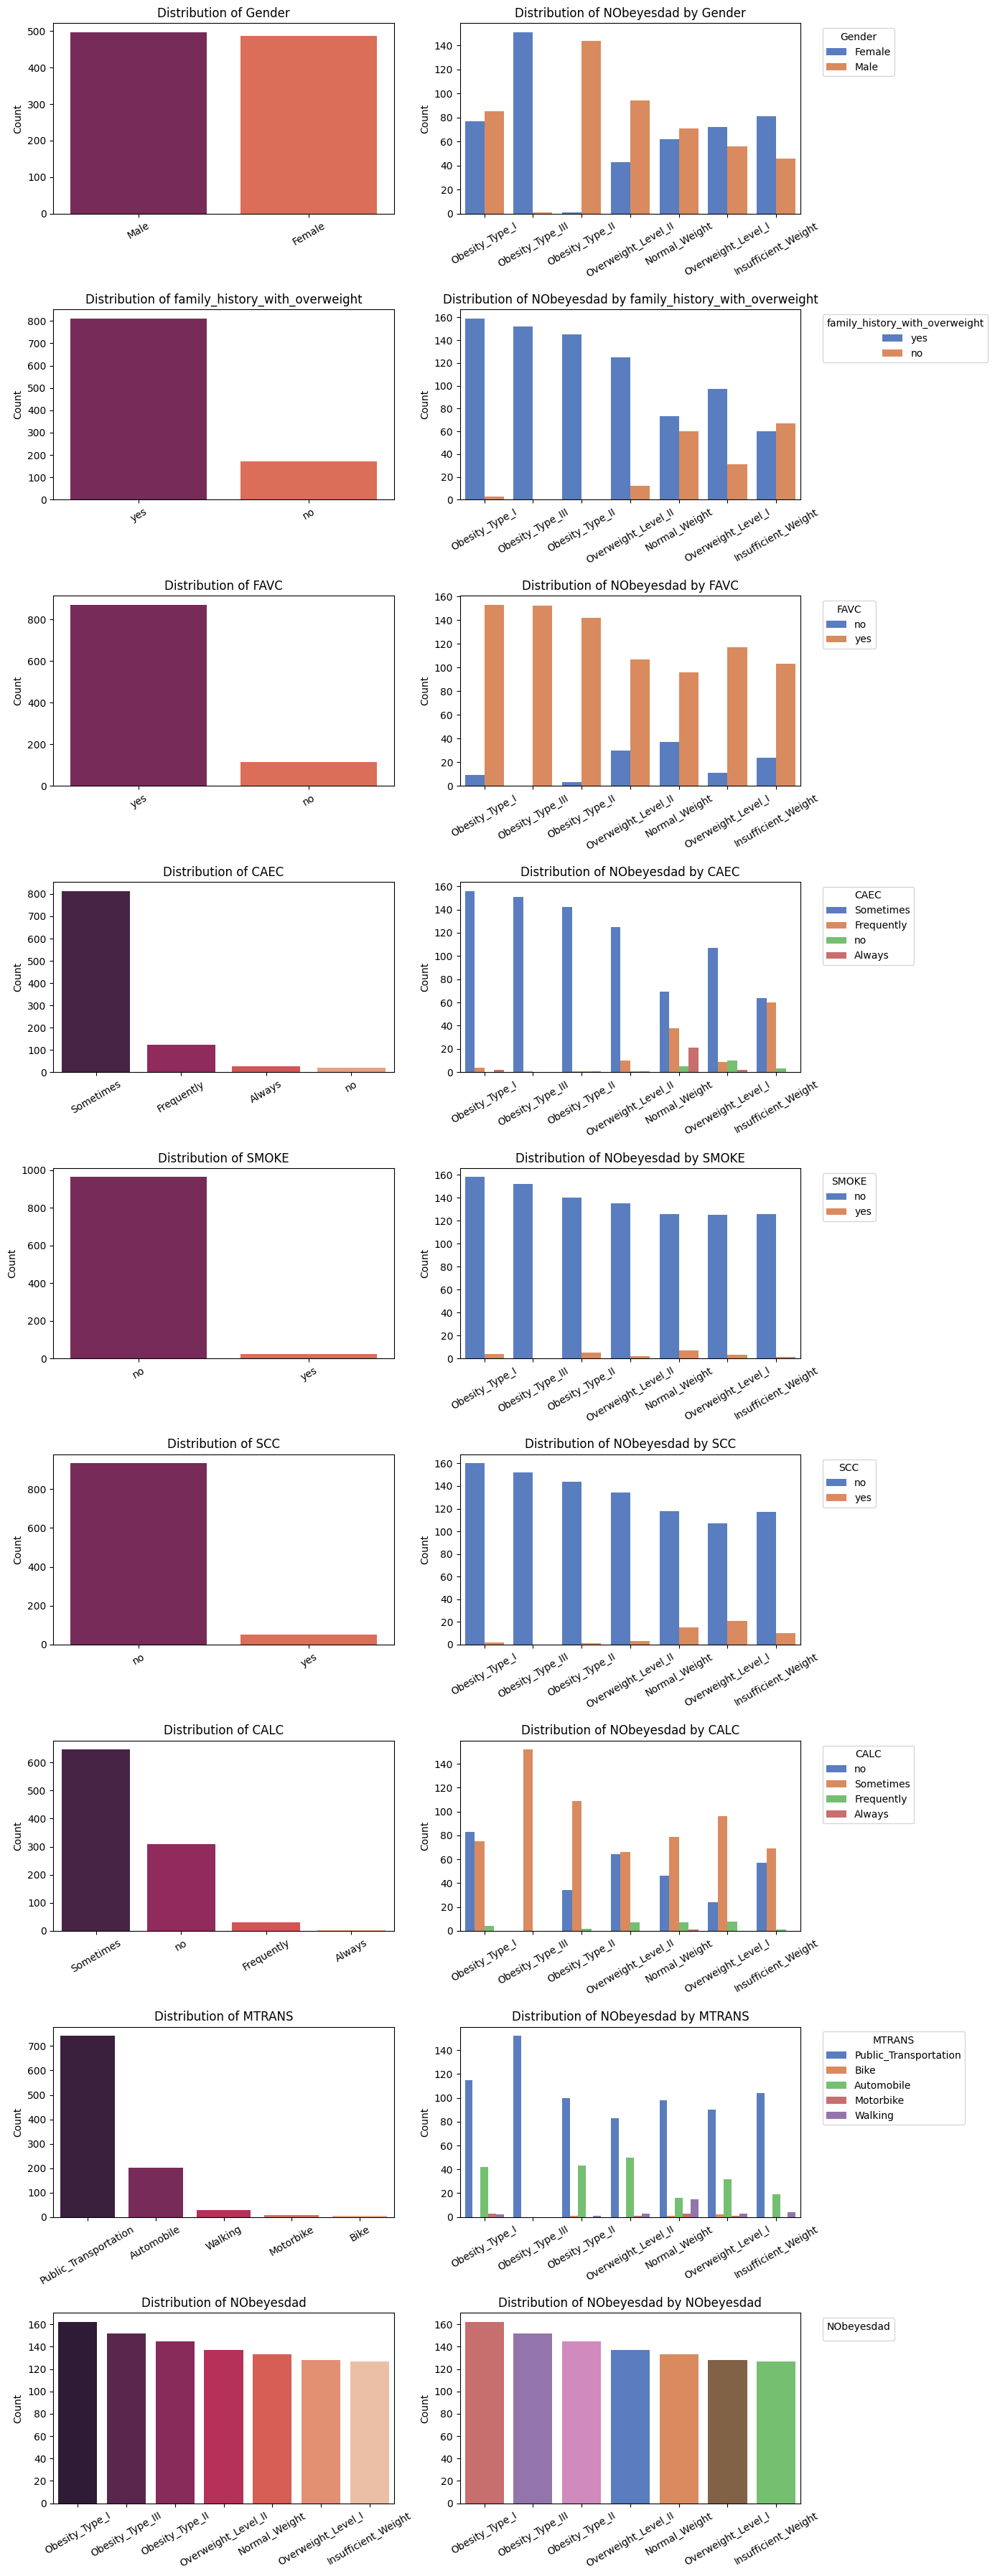

In [145]:
# Create subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=2, figsize=(14, len(categorical_columns) * 4))
fig.tight_layout(pad=5)

# Iterate through each categorical column
for i, column in enumerate(categorical_columns):
    # Plot 1: Overall Distribution
    ax1 = axes[i, 0]
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=ax1, palette="rocket")
    ax1.set_title(f"Distribution of {column}")
    ax1.set_xlabel("")
    ax1.set_ylabel("Count")
    ax1.tick_params(axis='x', rotation=30)

    # Plot 2: Distribution grouped by 'NObeyesdad'
    ax2 = axes[i, 1]
    sns.countplot(data=df, x="NObeyesdad", hue=column, order=df["NObeyesdad"].value_counts().index, ax=ax2, palette="muted")
    ax2.set_title(f"Distribution of NObeyesdad by {column}")
    ax2.set_xlabel("")
    ax2.set_ylabel("Count")
    ax2.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


In [146]:
for column in categorical_columns:
    print(f"\n=== Distribusi Kolom {column} ===")
    print(df[column].value_counts(dropna=False))


=== Distribusi Kolom Gender ===
Gender
Male      497
Female    487
Name: count, dtype: int64

=== Distribusi Kolom family_history_with_overweight ===
family_history_with_overweight
yes    811
no     173
Name: count, dtype: int64

=== Distribusi Kolom FAVC ===
FAVC
yes    870
no     114
Name: count, dtype: int64

=== Distribusi Kolom CAEC ===
CAEC
Sometimes     814
Frequently    123
Always         27
no             20
Name: count, dtype: int64

=== Distribusi Kolom SMOKE ===
SMOKE
no     962
yes     22
Name: count, dtype: int64

=== Distribusi Kolom SCC ===
SCC
no     932
yes     52
Name: count, dtype: int64

=== Distribusi Kolom CALC ===
CALC
Sometimes     646
no            308
Frequently     29
Always          1
Name: count, dtype: int64

=== Distribusi Kolom MTRANS ===
MTRANS
Public_Transportation    742
Automobile               202
Walking                   28
Motorbike                  8
Bike                       4
Name: count, dtype: int64

=== Distribusi Kolom NObeyesdad ===
NO

In [147]:
for column in categorical_columns:
    print(f"\n=== Distribusi NObeyesdad by {column} ===")
    print(pd.crosstab(df['NObeyesdad'], df[column]))


=== Distribusi NObeyesdad by Gender ===
Gender               Female  Male
NObeyesdad                       
Insufficient_Weight      81    46
Normal_Weight            62    71
Obesity_Type_I           77    85
Obesity_Type_II           1   144
Obesity_Type_III        151     1
Overweight_Level_I       72    56
Overweight_Level_II      43    94

=== Distribusi NObeyesdad by family_history_with_overweight ===
family_history_with_overweight  no  yes
NObeyesdad                             
Insufficient_Weight             67   60
Normal_Weight                   60   73
Obesity_Type_I                   3  159
Obesity_Type_II                  0  145
Obesity_Type_III                 0  152
Overweight_Level_I              31   97
Overweight_Level_II             12  125

=== Distribusi NObeyesdad by FAVC ===
FAVC                 no  yes
NObeyesdad                  
Insufficient_Weight  24  103
Normal_Weight        37   96
Obesity_Type_I        9  153
Obesity_Type_II       3  142
Obesity_Type_II

- Dari 145 kasus Obesity_Type_II, 144 adalah Male. Sebaliknya, dari 152 kasus Obesity_Type_III, 151 adalah Female. Ini adalah sinyal yang sangat kuat. Model akan belajar bahwa jika ingin memprediksi kedua kelas ini, Gender adalah salah satu petunjuk utamanya.
- Seseorang hampir tidak mungkin mengalami obesitas klinis (Tipe I, II, atau III) jika tidak memiliki riwayat keluarga. Dari total 462 kasus obesitas klinis, 456 di antaranya (98.7%) memiliki riwayat keluarga. Ini adalah fitur dengan daya prediksi yang masif.
- Pengguna Automobile (mobil) menyumbang porsi yang sangat besar dari semua kategori Overweight dan Obesity, namun hampir tidak ada di Normal_Weight. Sebaliknya, pengguna Walking dan Bike hampir secara eksklusif berada di Normal_Weight. Ini adalah pembeda gaya hidup yang sangat jelas. Akan tetapi, 152 kasus Obesity_Type_III menggunakan Public_Transportation.
- SCC (Pemantauan Kalori): Jika seseorang menjawab yes (memantau kalori), kemungkinan mereka untuk mengalami Obesity_Type_II atau Obesity_Type_III adalah nol.
- FAVC (Konsumsi Makanan Kalori Tinggi): Jika seseorang tidak sering mengonsumsi makanan berkalori tinggi (no), sangat kecil kemungkinannya untuk berada di kategori obesitas mana pun.
- CAEC (Makan di antara Waktu Makan): Polanya non-linear. Kategori obesitas didominasi oleh mereka yang menjawab Sometimes, bukan Frequently atau Always.

# Correlation

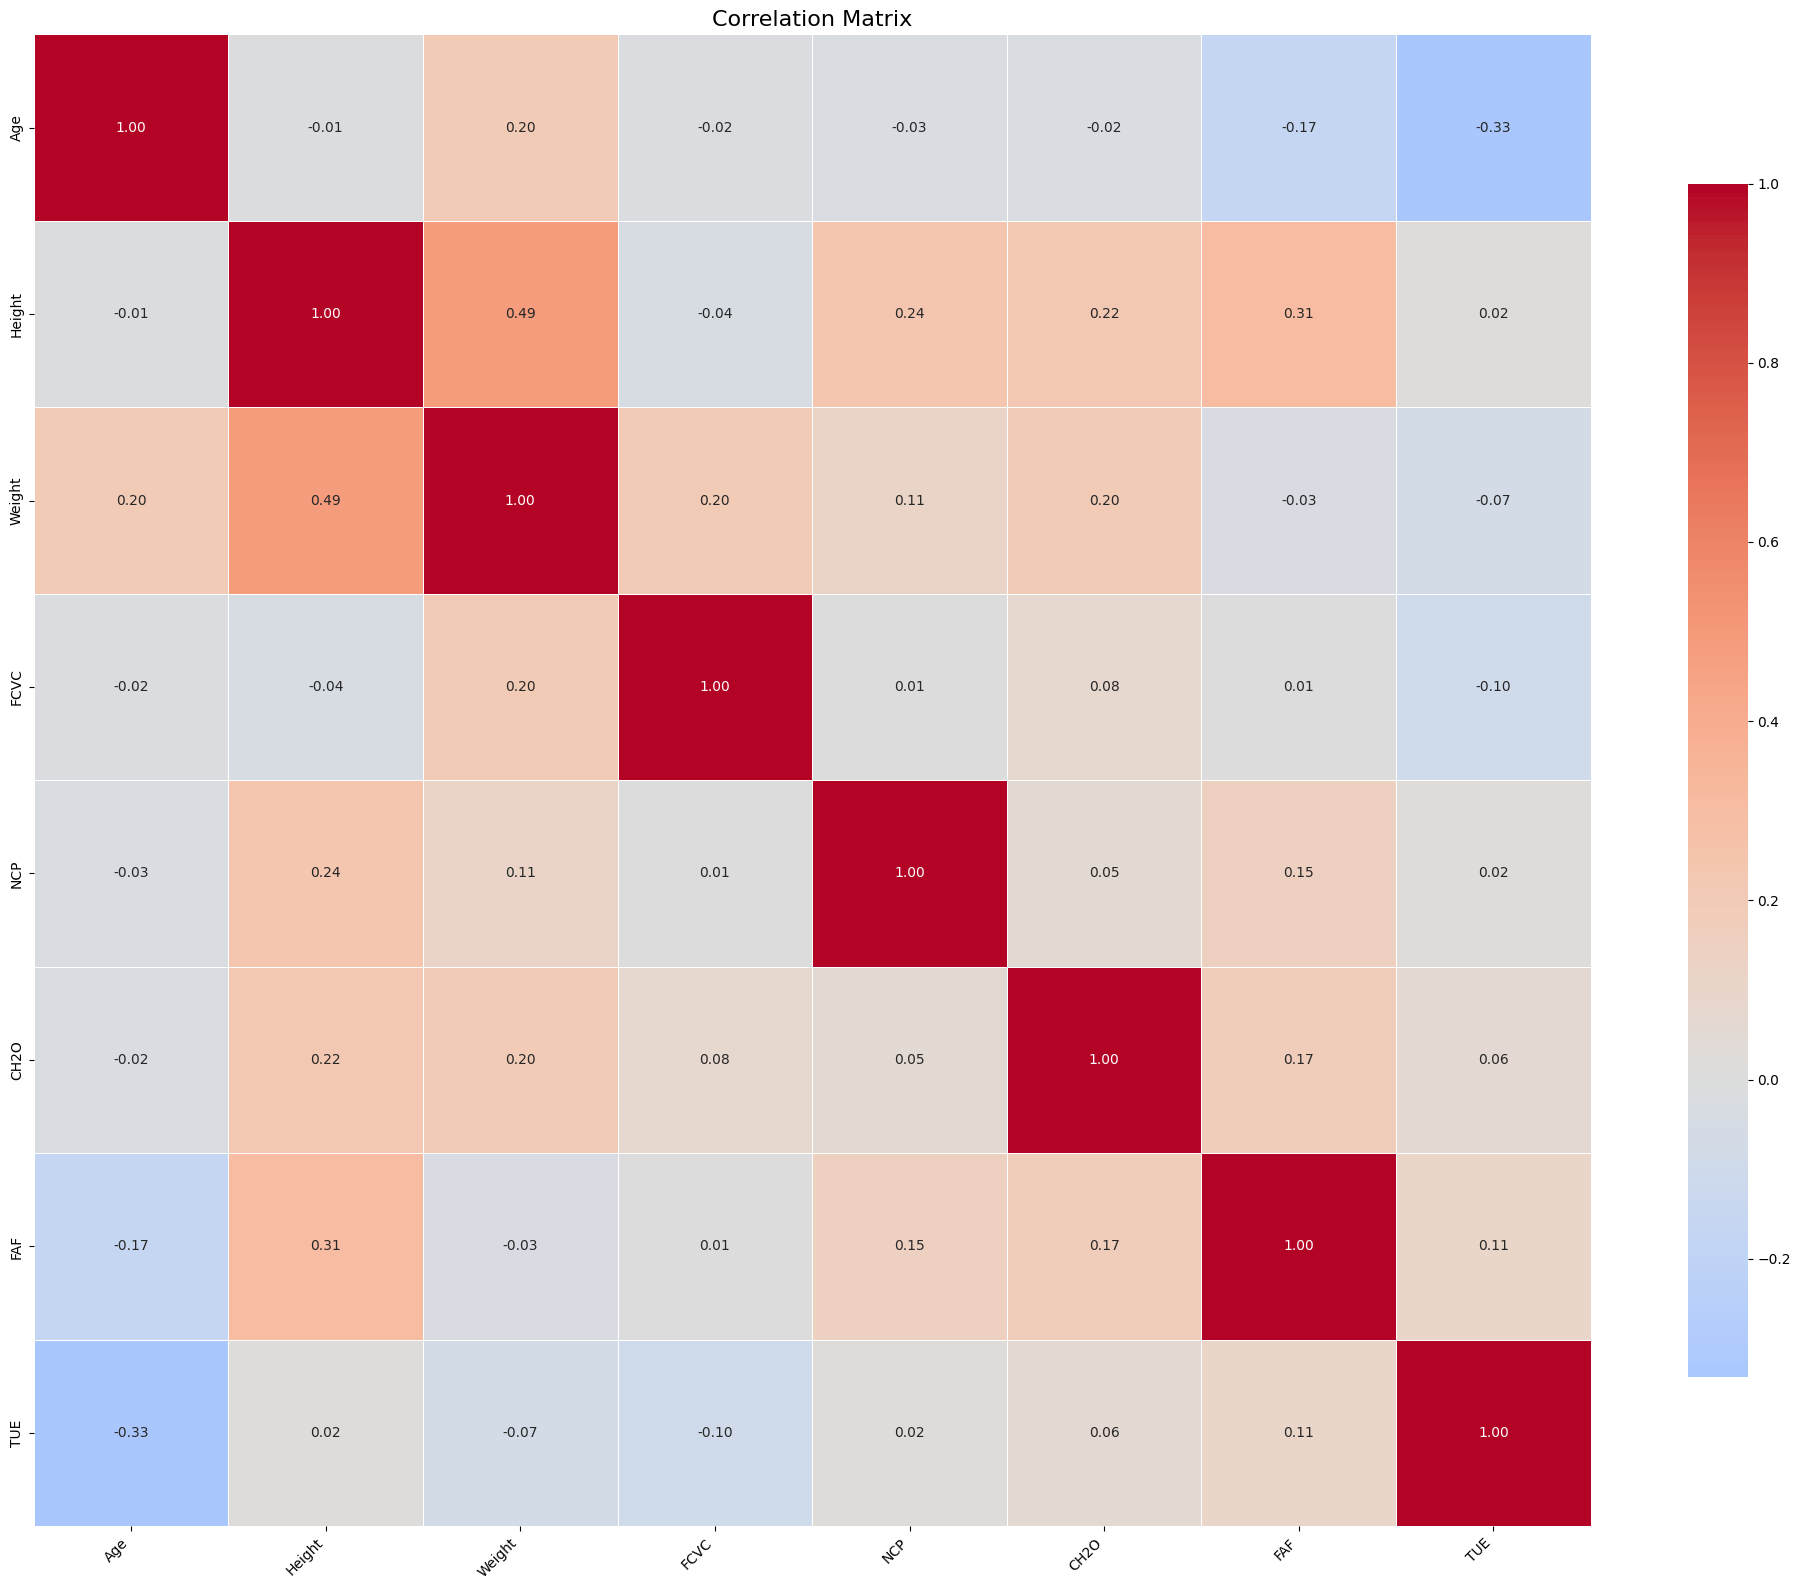

In [148]:
correlation_matrix = df.corr(numeric_only=True) 

plt.figure(figsize=(20, 16))
sns.heatmap(
    correlation_matrix,
    annot=True,      # Tampilkan nilai
    fmt=".2f",       # Format 2 desimal
    cmap="coolwarm",  # Warna biru (negatif) - merah (positif)
    center=0,        # Pusat warna pada 0
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x
plt.tight_layout()
plt.show()


Korelasi Height dan Weight sangatlah tinggi.

# Data Preprocessing

## Encoding

In [149]:
# Label Encoding untuk kolom binary/ordinal
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})  # Diubah yes=1, no=0 agar lebih intuitif
df['FAVC'] = df['FAVC'].map({'yes': 1, 'no': 0})
df['CAEC'] = df['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df['SMOKE'] = df['SMOKE'].map({'yes': 1, 'no': 0})
df['SCC'] = df['SCC'].map({'yes': 1, 'no': 0})
df['CALC'] = df['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

# One-Hot Encoding untuk MTRANS (kolom nominal)
mtrans_encoded = pd.get_dummies(df['MTRANS'], prefix='MTRANS', drop_first=True)
df = pd.concat([df, mtrans_encoded], axis=1)
df = df.drop('MTRANS', axis=1)  # Hapus kolom asli

# Cek hasil
print(df.head())

   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0   24    1.58   65.29                               1     0  2.03   
1       1   23    1.65   66.00                               0     0  3.00   
2       0   21    1.69   51.26                               1     1  3.00   
3       0   22    1.69   65.00                               1     1  2.00   
4       0   23    1.61   82.64                               1     1  2.96   

    NCP  CAEC  SMOKE  CH2O  SCC   FAF    TUE  CALC           NObeyesdad  \
0  2.74     1      0  2.00    0  1.28  1.019     0  Overweight_Level_II   
1  3.00     1      0  2.00    0  3.00  0.000     0        Normal_Weight   
2  3.18     2      0  1.91    0  0.48  0.625     0  Insufficient_Weight   
3  3.00     1      0  2.00    0  1.00  1.000     1        Normal_Weight   
4  1.00     1      0  2.98    0  0.74  2.000     1       Obesity_Type_I   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  

## Add new column

In [150]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
numerical_columns = ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Diakrenakan model yang digunakan Random Forest dan XGBoost tahan terhadap Multikolinearitas dan lalu kita akan menggunakna features scaling lebih baik untuk menyimpan features yang sudah merupakan kombinasi dulu.

## Scaling

Saya memutuskan untuk tidak scaling data karena model yang kami gunakan kedua  berdasarkan algoritma Decision Tree. Decision Tree  membagi data berdasarkan ambang fitur, dan ambang batas ini tidak terpengaruh oleh skala data.

# Modelling

In [151]:
x = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad'].map({'Insufficient_Weight':0,'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6})
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size= 0.2, random_state= 42)

## Random Forest

In [152]:
rf= RandomForestClassifier(random_state = 42)
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [153]:
param_grid = {
    'n_estimators': [100, 200, 300,500],          # Number of trees (larger range)
    'max_depth': [None, 10,50, 70, 100],         # Depth of trees (wider range)
    'min_samples_split': [2, 5, 10, 20],              # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4, 8],                 # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None, 0.5]      # Features to consider for best split
}

grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5,                      # 5-fold cross-validation
    scoring='f1',        # Evaluate using f1-score
    n_jobs=-1,                 # Use all available processors
    verbose=2
)

grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 50, 70, 100],
                         'max_features': ['sqrt', 'log2', None, 0.5],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='f1', verbose=2)

In [154]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Test set evaluation
best_rf = grid_search.best_estimator_

# Predict on the test set
ytest_pred = best_rf.predict(xtest)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## XGBoost

In [155]:
x_xgb = df.drop('NObeyesdad', axis=1)
y_xgb = df['NObeyesdad'].map({'Insufficient_Weight':0,'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6})
xtrain_xgb, xtest_xgb, ytrain_xgb,ytest_xgb = train_test_split(x,y,test_size= 0.2, random_state= 42)

In [156]:
xgbCls = xgb.XGBClassifier(enable_categorical=True)
xgbCls.fit(xtrain_xgb,ytrain_xgb)
ypred_xgb = xgbCls.predict(xtest_xgb)

In [157]:
param_grid_xgb= {
    'n_estimators': [100, 200, 500],        # Number of trees
    'max_depth': [3, 5, 10],               # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],          # Fraction of samples used for training
    'colsample_bytree': [0.6, 0.8, 1.0],   # Fraction of features used per tree
    'gamma': [0, 1, 5],                    # Minimum loss reduction required for a split
    'reg_alpha': [0, 0.1, 1],              # L1 regularization
    'reg_lambda': [1, 10, 100]             # L2 regularization
}

grid_search_xgb = GridSearchCV(
    estimator=xgbCls, 
    param_grid=param_grid, 
    cv=5,                     # 5-fold cross-validation
    scoring='f1',             # Evaluate using f1-score
    n_jobs=-1,                # Use all available processors
    verbose=2
)

grid_search_xgb.fit(xtrain_xgb, ytrain_xgb)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 50, 70, 100],
                         'max_features': ['sqrt', 'log2', None, 0.5],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='f1', verbose=2)

In [ ]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search_xgb.best_params_)

# Test set evaluation
best_xgb = grid_search_xgb.best_estimator_

# Predict on the test set
ytest_pred_xgb = best_xgb.predict(xtest_xgb)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Evaluation

In [168]:
accuracy = accuracy_score(ytest_xgb, ytest_pred_xgb)
print(f"Accuracy Score XGBoost on Test Set: {accuracy:.4f}")  # 4 digit desimal

Accuracy Score XGBoost on Test Set: 0.9797


In [169]:
accuracy = accuracy_score(ytest, ytest_pred)
print(f"Accuracy Score Random Forest on Test Set: {accuracy:.4f}")  # 4 digit desimal

Accuracy Score Random Forest on Test Set: 0.9797


In [166]:
classes = [0, 1, 2, 3, 4, 5, 6]  # Adjust to your actual class indices

ytest_binarized = label_binarize(ytest, classes=classes)

# Get predicted probabilities for Random Forest (best model)
ytest_pred_proba_rf = best_rf.predict_proba(xtest)

# Get predicted probabilities for XGBoost (best model)
ytest_pred_proba_xgb = best_xgb.predict_proba(xtest_xgb)

# Compute ROC AUC for Random Forest (macro average)
roc_auc_rf = roc_auc_score(ytest_binarized, ytest_pred_proba_rf, average="macro", multi_class="ovr")
print("ROC AUC for Random Forest:", roc_auc_rf)

# Compute ROC AUC for XGBoost (macro average)
roc_auc_xgb = roc_auc_score(ytest_binarized, ytest_pred_proba_xgb, average="macro", multi_class="ovr")
print("ROC AUC for XGBoost:", roc_auc_xgb)

ROC AUC for Random Forest: 0.9992440367155359
ROC AUC for XGBoost: 0.9997493726085149


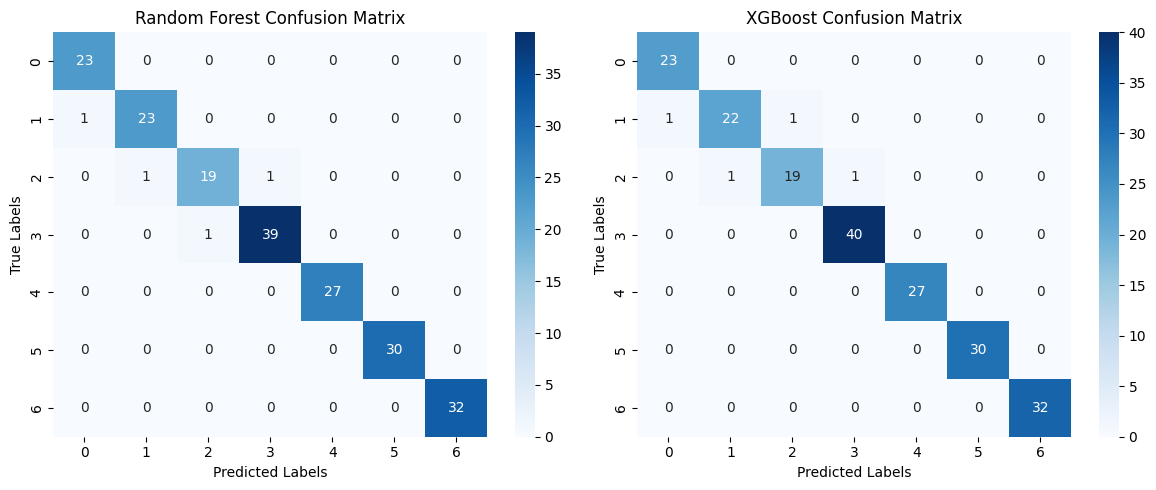

In [170]:
# Plot Confusion Matrix for Random Forest

# Confusion Matrix
conf_matrix = confusion_matrix(ytest, ytest_pred)
conf_matrix_xgb = confusion_matrix(ytest_xgb, ytest_pred_xgb)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# Plot Confusion Matrix for XGBoost
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('XGBoost Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

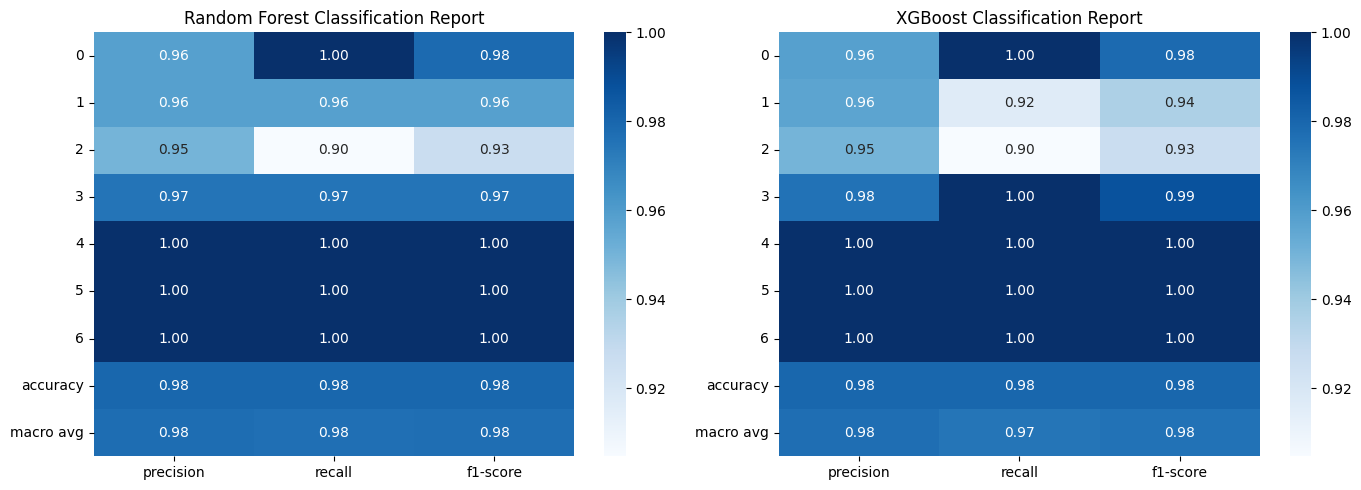

In [ ]:
# Function to parse classification report into a DataFrame
def classification_report_to_df(y_true, y_pred, target_names):
    report_dict = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
    df = pd.DataFrame(report_dict).transpose()
    return df

# Convert classification reports to DataFrames
rf_report_df = classification_report_to_df(ytest, ytest_pred, target_names=[str(cls) for cls in best_rf.classes_])
xgb_report_df = classification_report_to_df(ytest_xgb, ytest_pred_xgb, target_names=[str(cls) for cls in best_rf.classes_])

# Plot classification reports as heatmaps
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(rf_report_df.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Classification Report')

sns.heatmap(xgb_report_df.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('XGBoost Classification Report')

plt.tight_layout()
plt.show()

## Insight

Meskipun kedua model memiliki performa yang sangat tinggi dan bisa dibilang sama-sama sukses, jika harus memilih satu model terbaik untuk disimpan dan digunakan, maka XGBoost pemenangnya.

Alasan Utama:
- Skor ROC AUC yang Lebih Tinggi: Ini adalah metrik paling komprehensif dan XGBoost unggul di sini.
- Performa Setara pada Metrik Lain: Pada metrik akurasi dan jumlah kesalahan, XGBoost setidaknya setara dengan Random Forest.
- Keuntungan Tambahan: Dalam banyak kasus, model XGBoost yang sudah dilatih seringkali lebih cepat dalam membuat prediksi (inference) dibandingkan Random Forest, yang bisa menjadi keuntungan untuk aplikasi di dunia nyata.


## Save Model

In [171]:
best_model = best_xgb
pickle.dump(best_model, open('model_full_xgb.pkl', 'wb'))

# Feature Importance

--- Peringkat dan Akumulasi Kepentingan Fitur ---
                           Feature  Importance  Cumulative Importance
19                             BMI    0.411342               0.411342
0                           Gender    0.409768               0.821110
1                              Age    0.022913               0.844023
3                           Weight    0.019396               0.863419
13                             TUE    0.016045               0.879464
5                             FAVC    0.014474               0.893938
9                            SMOKE    0.013851               0.907789
17    MTRANS_Public_Transportation    0.013450               0.921239
11                             SCC    0.013237               0.934476
2                           Height    0.011761               0.946237
7                              NCP    0.011046               0.957283
10                            CH2O    0.010262               0.967546
6                             FCVC    0.

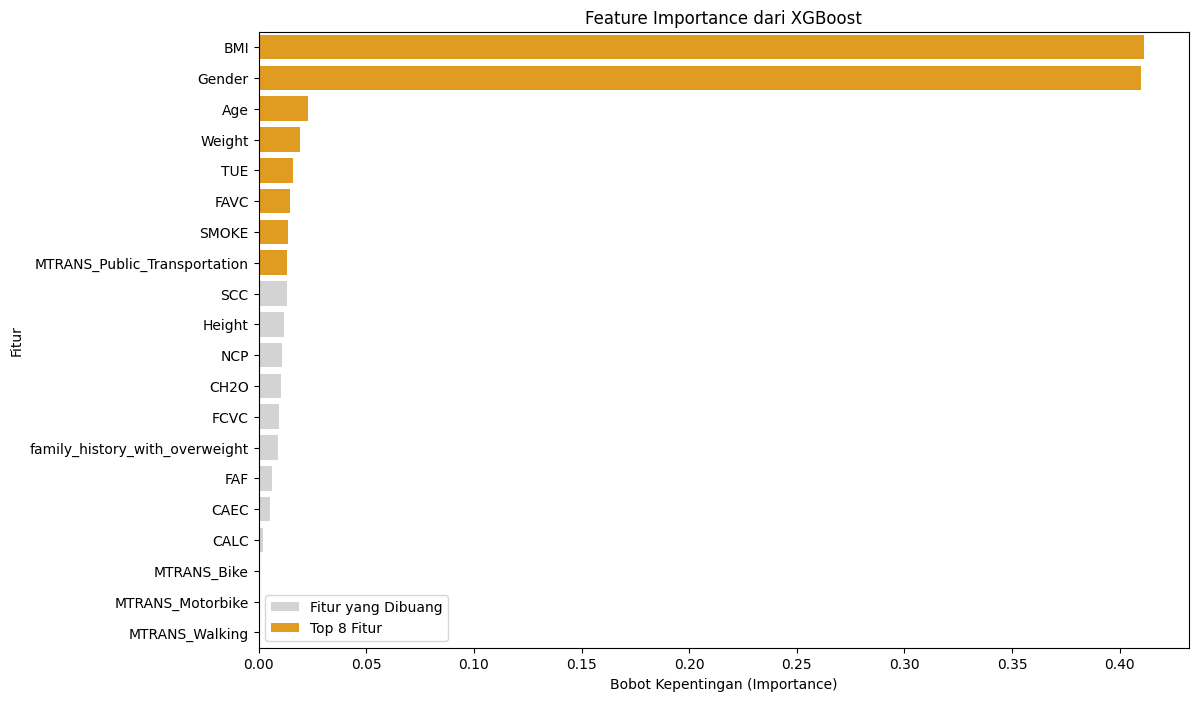

In [ ]:
# 1. Dapatkan dan urutkan feature importance
importances = best_xgb.feature_importances_
feature_names = x.columns 

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 2. (Opsional tapi Informatif) Hitung Akumulasi Bobot
feature_importance_df['Cumulative Importance'] = feature_importance_df['Importance'].cumsum()

print("--- Peringkat dan Akumulasi Kepentingan Fitur ---")
print(feature_importance_df)


# 3. Pilih N Fitur Teratas
JUMLAH_FITUR_UNTUK_DIPILIH = 8

selected_features_df = feature_importance_df.head(JUMLAH_FITUR_UNTUK_DIPILIH)
selected_feature_names = selected_features_df['Feature'].tolist()

print(f"\n--- {JUMLAH_FITUR_UNTUK_DIPILIH} Fitur Teratas yang Dipilih ---")
print(selected_feature_names)


# 4. Plot yang Diperbaiki untuk Visualisasi yang Lebih Jelas
plt.figure(figsize=(12, 8))

# Buat plot bar untuk semua fitur agar bisa dibandingkan
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='lightgray', label='Fitur yang Dibuang')

# Timpa plot bar untuk fitur yang terpilih dengan warna berbeda
sns.barplot(x='Importance', y='Feature', data=selected_features_df, color='orange', label=f'Top {JUMLAH_FITUR_UNTUK_DIPILIH} Fitur')

plt.xlabel('Bobot Kepentingan (Importance)')
plt.ylabel('Fitur')
plt.title('Feature Importance dari XGBoost')
plt.legend()
plt.show()

Dari 20 fitur saya memutusan untuk menyimpan 8 fitur saja untuk simplisitas

In [180]:
selected_feature_names = ['BMI', 'Gender', 'Age', 'Weight', 'TUE', 'FAVC', 'SMOKE', 'MTRANS_Public_Transportation']
X_selected = x[selected_feature_names]
print("Bentuk dataset baru (X_selected):", X_selected.shape)
X_train_lite, X_test_lite, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# Latih model baru (XGBoost) hanya dengan 8 fitur
model_lite = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_lite.fit(X_train_lite, y_train)

# Lakukan prediksi dan evaluasi
y_pred_lite = model_lite.predict(X_test_lite)
accuracy_lite = accuracy_score(y_test, y_pred_lite)

# Definisikan mapping Anda dalam sebuah variabel
target_mapping = {
    'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 
    'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 
    'Obesity_Type_III': 6
}
target_names = list(target_mapping.keys())


print(f"--- Hasil Model Lite ({len(selected_feature_names)} Fitur) ---")
print(f"Akurasi: {accuracy_lite:.4f}")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_lite, target_names=target_names))

Bentuk dataset baru (X_selected): (984, 8)
--- Hasil Model Lite (8 Fitur) ---
Akurasi: 0.9898
Laporan Klasifikasi:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        23
      Normal_Weight       1.00      0.96      0.98        24
 Overweight_Level_I       1.00      0.95      0.98        21
Overweight_Level_II       0.98      1.00      0.99        40
     Obesity_Type_I       1.00      1.00      1.00        27
    Obesity_Type_II       1.00      1.00      1.00        30
   Obesity_Type_III       1.00      1.00      1.00        32

           accuracy                           0.99       197
          macro avg       0.99      0.99      0.99       197
       weighted avg       0.99      0.99      0.99       197



Bisa dilihat jasilnya tetap konsistern bagus oleh karena itu kita simpan model terbaru kita.

In [181]:
with open('obesity_model_lite.pkl', 'wb') as f:
    pickle.dump(model_lite, f)

# Pipeline

Berikut adalah seluruh pipeline preprocessing yang dilakukan beserta library yang dibutuhkan.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class BMICreator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        height = X['Height']
        weight = X['Weight']
        bmi = np.where(height > 0, weight / (height**2), 0)
        X['BMI'] = bmi
        return X

class ManualMapper(BaseEstimator, TransformerMixin):
    def __init__(self, mapping_dict, columns):
        self.mapping_dict = mapping_dict
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = X_copy[col].map(self.mapping_dict)
        return X_copy

df = pd.read_csv('ObesityDataSet2.csv')
df['Age'] = df['Age'].replace(' years', '', regex=True).astype(int)
df = df.dropna().drop_duplicates()

X = df.drop("NObeyesdad", axis=1)
y_raw = df["NObeyesdad"]

target_mapping = {
    'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2,
    'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
y_encoded = y_raw.map(target_mapping)

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
gender_feature = ['Gender']
family_history_feature = ['family_history_with_overweight']
yes_no_features = ['FAVC', 'SMOKE', 'SCC']
ordinal_features = ['CAEC', 'CALC']
caec_order = ['no', 'Sometimes', 'Frequently', 'Always']
calc_order = ['no', 'Sometimes', 'Frequently', 'Always']
nominal_features = ['MTRANS']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('ord', OrdinalEncoder(categories=[caec_order, calc_order]), ordinal_features),
        ('nom', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_features)
    ],
    remainder='drop'
)

full_pipeline = Pipeline(steps=[
    ('bmi_creator', BMICreator()),
    ('gender_mapper', ManualMapper(mapping_dict={'Female': 0, 'Male': 1}, columns=gender_feature)),
    ('family_history_mapper', ManualMapper(mapping_dict={'yes': 1, 'no': 0}, columns=family_history_feature)),
    ('yes_no_mapper', ManualMapper(mapping_dict={'yes': 1, 'no': 0}, columns=yes_no_features)),
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

Disini pipeline yang dibuat hanyalah sampai data preprocessign sebelum modelling, gridsearch dan terakhir featrues selection. Dengan menjalankan GridSearchCV terlebih dahulu pada seluruh set fitur, kita memastikan bahwa peringkat kepentingan fitur (feature_importances_) diekstrak dari versi model yang paling kuat dan telah teroptimasi secara maksimal. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

full_pipeline.fit(X_train, y_train)

y_pred = full_pipeline.predict(X_test)

print(f"Akurasi dari Pipeline: {accuracy_score(y_test, y_pred):.4f}")

target_names = list(target_mapping.keys())

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=target_names))

Akurasi dari Pipeline: 0.9848

Laporan Klasifikasi:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        23
      Normal_Weight       0.96      0.96      0.96        24
 Overweight_Level_I       1.00      0.90      0.95        21
Overweight_Level_II       0.98      1.00      0.99        40
     Obesity_Type_I       1.00      1.00      1.00        27
    Obesity_Type_II       1.00      1.00      1.00        30
   Obesity_Type_III       1.00      1.00      1.00        32

           accuracy                           0.98       197
          macro avg       0.98      0.98      0.98       197
       weighted avg       0.99      0.98      0.98       197



Hasil diatas adalah hasil dari pemodelan XGBoost pipeline TANPA adanya modelling untuk gridsearcv dan feature importance.

# Essay

**Testing apa saja yang perlu Anda lakukan untuk memastikan bahwa model prediksi tingkat obesitas ini akan berjalan dengan baik dan tidak akan mengalami gangguan ketika berada di sistem produksi? Jelaskan rencana pengujian Anda secara sistematis dan Sertakan contoh berdasarkan fitur dalam dataset obesitas, seperti bagaimana jika nilai pada Age, Weight, SMOKE, atau MTRANS dimanipulasi.**


Proses ini diawali dengan pengujian unit, yang merupakan fondasi di mana setiap fungsi individual kode diuji secara terisolasi. Pada tahap ini, kita akan memverifikasi secara spesifik bahwa fungsi kalkulasi BMI di frontend tidak hanya menghasilkan nilai yang benar untuk input tinggi dan berat yang wajar, tetapi juga mampu menangani kasus ekstrem seperti input tinggi nol tanpa menyebabkan aplikasi crash. Demikian pula di backend, setiap logika transformasi data akan diuji, misalnya memastikan input string seperti "Male" pada fitur Gender secara konsisten dipetakan ke nilai numerik 1 dan input "No" pada fitur SMOKE dipetakan ke 0, termasuk validasi terhadap inkonsistensi penulisan seperti huruf besar atau kecil.

Setelah setiap komponen terbukti andal, pengujian berlanjut ke level integrasi, di mana fokusnya adalah memastikan komunikasi antar komponen, terutama antara frontend Streamlit dan backend FastAPI, berjalan tanpa hambatan. Pengujian ini akan mensimulasikan pengiriman data lengkap dari formulir frontend ke API backend, memvalidasi bahwa backend dapat menerima dan memproses payload JSON dengan benar, menjalankan model, dan mengembalikan respons yang valid. Keberhasilan pada tahap ini diukur dari kemampuan frontend untuk menerima kembali respons tersebut dan menampilkannya dengan benar kepada pengguna. Ini kemudian divalidasi lebih lanjut melalui pengujian ujung ke ujung (E2E), yang mensimulasikan seluruh alur kerja pengguna secara otomatis menggunakan alat seperti Selenium atau Playwright. Skrip pengujian akan membuka aplikasi, mengisi formulir dengan profil pengguna yang telah ditentukan, menekan tombol prediksi, dan memastikan hasil akhir yang ditampilkan di layar sesuai dengan yang diharapkan.

Aspek terakhir dan yang paling kritikal adalah pengujian ketahanan (robustness testing), di mana kita secara sengaja "menyerang" sistem dengan data yang dimanipulasi untuk menguji batas kemampuannya. Ini lebih dari sekadar menguji nilai di luar batas wajar untuk Age dan Weight; ini juga mencakup pengiriman tipe data yang salah (misalnya, teks di kolom usia) untuk memastikan backend menolaknya dengan pesan error yang sesuai (seperti error 422 Unprocessable Entity), bukan berhenti bekerja. Selain itu, pengujian ini akan mencoba mengirimkan nilai string yang tidak terduga untuk fitur kategorikal seperti MTRANS (misalnya, "Pesawat") untuk memverifikasi bahwa sistem memiliki logika penanganan kesalahan yang dapat memberikan respons terkendali dan informatif, sehingga membuktikan bahwa aplikasi tidak hanya akurat tetapi juga stabil dan aman saat dihadapkan pada input dunia nyata yang tidak dapat diprediksi


**Anda telah berhasil membangun dan mendistribusikan model machine learning ke dalam sistem informasi klinik untuk memprediksi tingkat obesitas seseorang berdasarkan data gaya hidup. Setelah berjalan selama beberapa bulan, Anda mulai memperhatikan bahwa hasil prediksi mulai menunjukkan penurunan akurasi. Jelaskan apa yang dimaksud dengan model drift dan data drift dalam konteks sistem prediksi obesitas ini?**

Penurunan akurasi model setelah beberapa bulan di sistem produksi seringkali disebabkan oleh fenomena yang dikenal sebagai model drift atau data drift. Model drift, atau concept drift, terjadi ketika hubungan fundamental antara fitur dan hasil di dunia nyata berubah, sehingga "aturan" yang telah dipelajari model menjadi usang. Dalam konteks ini, misalnya, jika sebuah kampanye kesehatan baru membuat bersepeda menjadi populer di semua kalangan, maka fitur MTRANS yang sebelumnya mungkin berkorelasi kuat dengan berat badan normal, kini kehilangan kekuatan prediktifnya. Aturan dalam model tidak lagi mencerminkan realitas yang baru.

Di sisi lain, data drift, atau feature drift, terjadi ketika distribusi statistik dari data input baru berbeda secara signifikan dari data yang digunakan saat pelatihan, meskipun hubungan dasarnya tetap sama. Sebagai contoh, jika klinik pada awalnya melayani populasi mahasiswa dengan rata-rata Age 22 tahun, namun kemudian memperluas layanan ke area perkantoran dengan rata-rata Age 40 tahun, maka model akan menerima data dengan distribusi usia yang sangat berbeda. Meskipun hubungan antara usia dan obesitas tetap valid, performa model akan menurun karena ia tidak "berpengalaman" dengan demografi data yang baru ini, sehingga menyebabkan penurunan akurasi secara keseluruhan.
